<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch03_06_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%B6%84%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.06. 기초통계 - 분포통계량
---
* 날짜:
* 이름:

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [2]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(0, 1, 1000)

* `a` 분포 그리기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <a list of 10 Patch objects>)

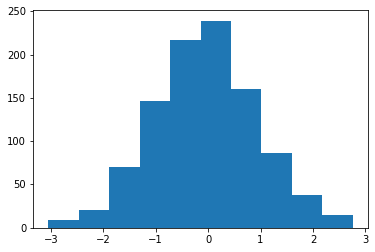

In [3]:
plt.hist(a)

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [28]:
# percentile 사용
print(np.percentile(a, 10))
# quantile 사용
print(np.quantile(a, 0.1))

-1.2991423253580128
-1.2991423253580128


* 하위 80% 에 위치한 값 확인

In [29]:
# percentile 사용
print(np.percentile(a, 80))
# quantile 사용
print(np.quantile(a, 0.8))

0.7883967913601156
0.7883967913601156


### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [4]:
from scipy.stats import skew
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

In [5]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

In [6]:
skew(x1)  # x1의 왜도

0.0

In [7]:
skew(x2)  # x2의 왜도

0.478415965387339

In [8]:
skew(x3)  # x3의 왜도

-0.4784159653873392

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [9]:
from scipy.stats import kurtosis
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

In [10]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

In [11]:
kurtosis(x1)  # x1의 첨도

-1.3

In [12]:
kurtosis(x2)  # x2의 첨도

-1.3650000000000002

In [13]:
kurtosis(x3)  # x3의 첨도

-0.9975510204081632

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [17]:
gamma = sp.stats.gamma(a=5)
x3 = gamma.rvs(1000, random_state=0)
gamma1 = sp.stats.gamma(a=12)
x4 = gamma1.rvs(1000, random_state=0)
x2 = -1*x3
x1 = -1*x4

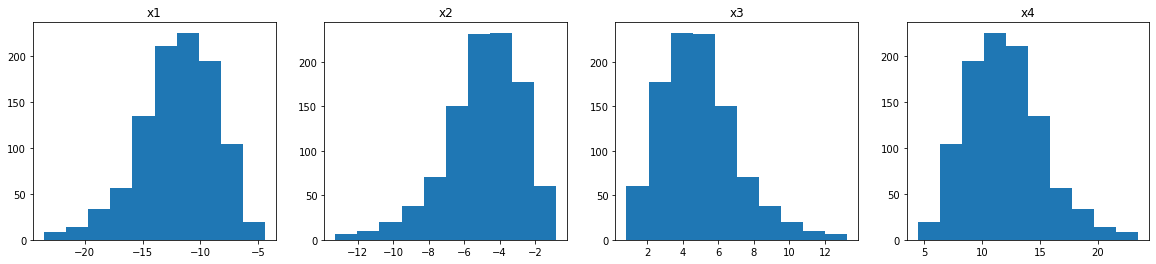

In [27]:
plt.figure(figsize=(20,4))
plt.subplot(141)
plt.title('x1')
_=plt.hist(x1)
  
plt.subplot(142)
plt.title('x2')
_=plt.hist(x2)

plt.subplot(143)
plt.title('x3')
_=plt.hist(x3)
  
plt.subplot(144)
plt.title('x4')
_=plt.hist(x4)

In [23]:
print('x1의 왜도:', skew(x1))
print('x2의 왜도:', skew(x2))
print('x3의 왜도:', skew(x3))
print('x4의 왜도:', skew(x4))

x1의 왜도: -0.5583272638164047
x2의 왜도: -0.8519288478573643
x3의 왜도: 0.8519288478573643
x4의 왜도: 0.5583272638164047


In [24]:
print('x1의 첨도:', kurtosis(x1))
print('x2의 첨도:', kurtosis(x2))
print('x3의 첨도:', kurtosis(x3))
print('x4의 첨도:', kurtosis(x4))

x1의 첨도: 0.32776590429672847
x2의 첨도: 0.8950674512429684
x3의 첨도: 0.8950674512429684
x4의 첨도: 0.32776590429672847


#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.

In [30]:
df = pd.read_csv('/content/train.csv')

In [31]:
df=df.dropna() # 결측치 제거

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [36]:
print('Age의 분산:', np.var(df.Age, ddof=1))
print('Age의 표준편차:', np.std(df.Age, ddof=1))
print('Age의 범위:', np.ptp(df.Age))
print('Age의 사분위범위:', np.quantile(df.Age, 0.75)-np.quantile(df.Age, 0.25))
print('Age의 왜도:', skew(df.Age))
print('Age의 첨도:', kurtosis(df.Age))

Age의 분산: 244.7305423887588
Age의 표준편차: 15.643865966849717
Age의 범위: 79.08
Age의 사분위범위: 23.5
Age의 왜도: 0.00959634800422217
Age의 첨도: -0.2526594531274511


In [37]:
print('Fare 분산:', np.var(df.Fare, ddof=1))
print('Fare의 표준편차:', np.std(df.Fare, ddof=1))
print('Fare의 범위:', np.ptp(df.Fare))
print('Fare의 사분위범위:', np.quantile(df.Fare, 0.75)-np.quantile(df.Fare, 0.25))
print('Fare의 왜도:', skew(df.Fare))
print('Fare의 첨도:', kurtosis(df.Fare))

Fare 분산: 5828.993085005896
Fare의 표준편차: 76.34784270040574
Fare의 범위: 512.3292
Fare의 사분위범위: 60.3
Fare의 왜도: 2.693570626858996
Fare의 첨도: 10.426532993487772
